In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def collect_and_clean_data(file_path):
    # Load data
    data = pd.read_csv(file_path)

    # Print columns to check their names
    print("Columns in dataset:", data.columns.tolist())

    # Clean column names
    data.columns = data.columns.str.strip()  # Remove leading/trailing whitespace
    data.columns = data.columns.str.replace('\xa0', ' ')  # Replace non-breaking spaces

    # Print cleaned columns
    print("Cleaned Columns:", data.columns.tolist())

    # Clean data entries
    for col in data.columns:
        if data[col].dtype == 'object':  # Apply only to string columns
            data[col] = data[col].str.strip()  # Remove leading/trailing whitespace
            data[col] = data[col].str.replace('\xa0', ' ')  # Replace non-breaking spaces

    # Handle non-numeric values in numeric columns
    for col in data.columns:
        if data[col].dtype == 'object':
            try:
                # Attempt to convert to numeric
                data[col] = pd.to_numeric(data[col], errors='coerce')
            except ValueError:
                # If there's a ValueError, it's likely non-numeric data present
                pass

        # Replace non-numeric (NaN) values with the average of the above and below cells
        if data[col].dtype in ['float64', 'int64']:
            data[col] = data[col].interpolate(method='linear', limit_direction='both')

    # Handle missing values (if any remain after interpolation)
    data = data.dropna()  # Optionally use data.fillna() for different handling

    # Print columns after missing value handling
    print("Columns after missing value handling:", data.columns.tolist())

    # Normalize numerical features
    numerical_features = ['Age(yrs)', 'BMI', 'TSH (mIU/L)']

    # Check if numerical features exist
    for feature in numerical_features:
        if feature not in data.columns:
            print(f"Warning: '{feature}' not found in dataset.")

    # Apply normalization if features are present
    existing_numerical_features = [feature for feature in numerical_features if feature in data.columns]
    if existing_numerical_features:
        scaler = MinMaxScaler()
        data[existing_numerical_features] = scaler.fit_transform(data[existing_numerical_features])

    # Manage categorical variables
    categorical_features = ['Blood Group']  # Only one-hot encode necessary columns
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

    # Print columns after one-hot encoding
    print("Columns after one-hot encoding:", data.columns.tolist())

    # Save cleaned data
    cleaned_dataset_path = 'cleaned_data.csv'
    data.to_csv(cleaned_dataset_path, index=False)

    print(f"Data collected and cleaned successfully. Cleaned data saved to '{cleaned_dataset_path}'")
    return data

# Example usage
file_path = '/content/PCOS_extended_dataset.csv'  # Replace with your actual file name
data = collect_and_clean_data(file_path)


Columns in dataset: ['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age(yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
Cleaned Columns: ['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age(yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle len

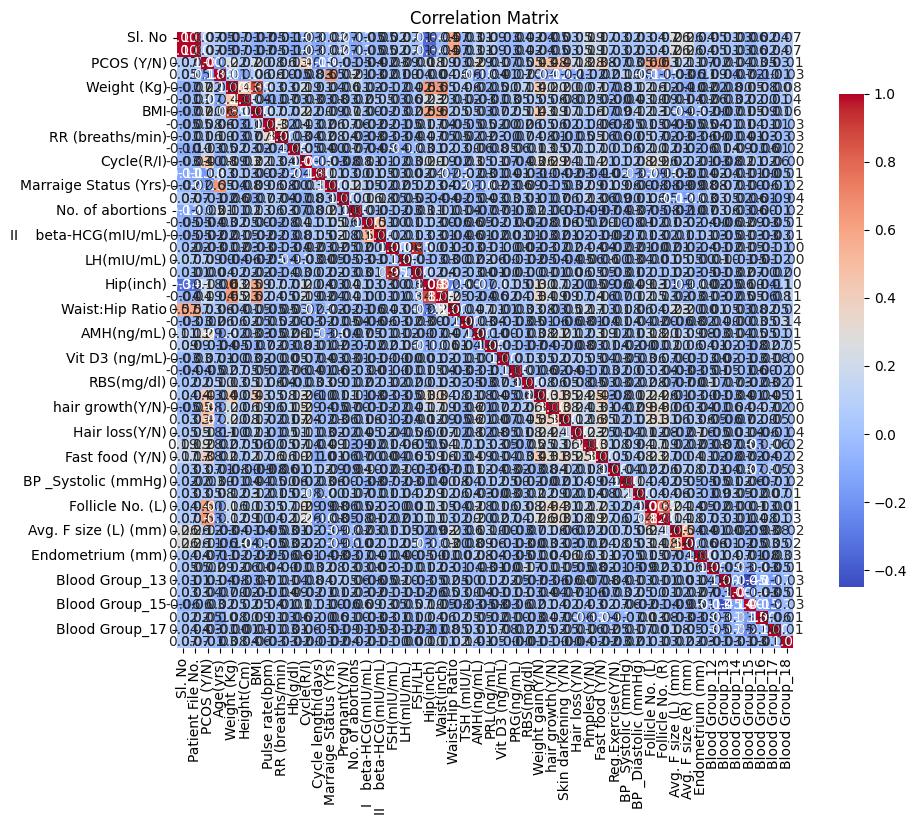

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
cleaned_data_path = 'cleaned_data.csv'  # Path where the cleaned data was saved
data = pd.read_csv(cleaned_data_path)

# Generate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


Now we have randomly selected 4 features from the dataset and will now evaluate feature importance

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       263
           1       0.96      0.92      0.94       137

    accuracy                           0.96       400
   macro avg       0.96      0.95      0.96       400
weighted avg       0.96      0.96      0.96       400



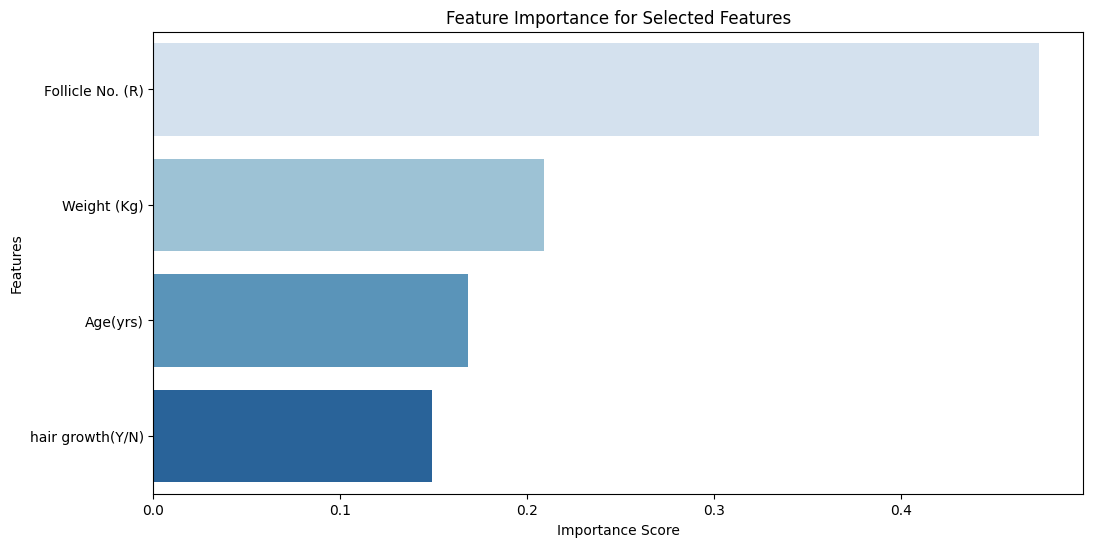

         Feature  Importance
Follicle No. (R)    0.473669
     Weight (Kg)    0.209073
        Age(yrs)    0.168394
hair growth(Y/N)    0.148864


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your cleaned data
data = pd.read_csv('cleaned_data.csv')

# Define your target variable
target_variable = 'PCOS (Y/N)'

# Define your selected features (you can change these to any 4 features you prefer)
selected_features = [
    'Age(yrs)', 'Weight (Kg)', 'Follicle No. (R)', 'hair growth(Y/N)']

# Define your features and target variable
X = data[selected_features]  # Use selected features
y = data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, hue='Feature', palette='Blues', legend=False)
plt.title('Feature Importance for Selected Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Display the feature importance DataFrame without index
print(feature_importance.to_string(index=False))


Multi Layer Perceptron (MLP)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Define the features and target variable
X = data[['Age(yrs)', 'Weight (Kg)', 'Follicle No. (R)', 'hair growth(Y/N)']]
y = data['PCOS (Y/N)']

# Step 2: Drop rows with any missing values in X
X = X.dropna()

# Step 3: Also drop the corresponding rows in the target variable to keep the alignment
y = y.loc[X.index]

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Hidden layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 7: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Fit the model to the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test))

# Step 9: Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 10: Make predictions (convert probabilities to binary predictions)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 11: Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5900 - loss: 0.6515 - val_accuracy: 0.8700 - val_loss: 0.3781
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8885 - loss: 0.3224 - val_accuracy: 0.8700 - val_loss: 0.3399
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8740 - loss: 0.3326 - val_accuracy: 0.8700 - val_loss: 0.3436
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8929 - loss: 0.2829 - val_accuracy: 0.8817 - val_loss: 0.3325
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8844 - loss: 0.3010 - val_accuracy: 0.8717 - val_loss: 0.3319
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8956 - loss: 0.2739 - val_accuracy: 0.8750 - val_loss: 0.3320
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8921 - loss: 0.3038 - val_accuracy: 0.8817 - val_loss: 0.3262
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9002 - loss: 0.2691 - val_accuracy: 0.8800 - val_loss: 0.3227
Ep

Gaussian Naive Bayes (GNB)

In [2]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Step 1: Define the features and target variable
X = data[['Age(yrs)', 'Weight (Kg)', 'Follicle No. (R)', 'hair growth(Y/N)']]
y = data['PCOS (Y/N)']

# Step 2: Drop rows with any missing values in X
X = X.dropna()

# Step 3: Also drop the corresponding rows in the target variable to keep the alignment
y = y.loc[X.index]

# Step 4: Perform RFE with Logistic Regression to select the top features
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Step 5: Select only the top features from RFE
X_selected = X[X.columns[fit.support_]]

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Step 7: Create and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = gnb.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract the weighted average precision, recall, and F1-score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

print(f"Accuracy: {accuracy:.2f}")
print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1-Score: {f1_score:.2f}")


Accuracy: 0.86
Weighted Precision: 0.86
Weighted Recall: 0.86
Weighted F1-Score: 0.86


Plot to compare the performance metrics of GNB and  MLP

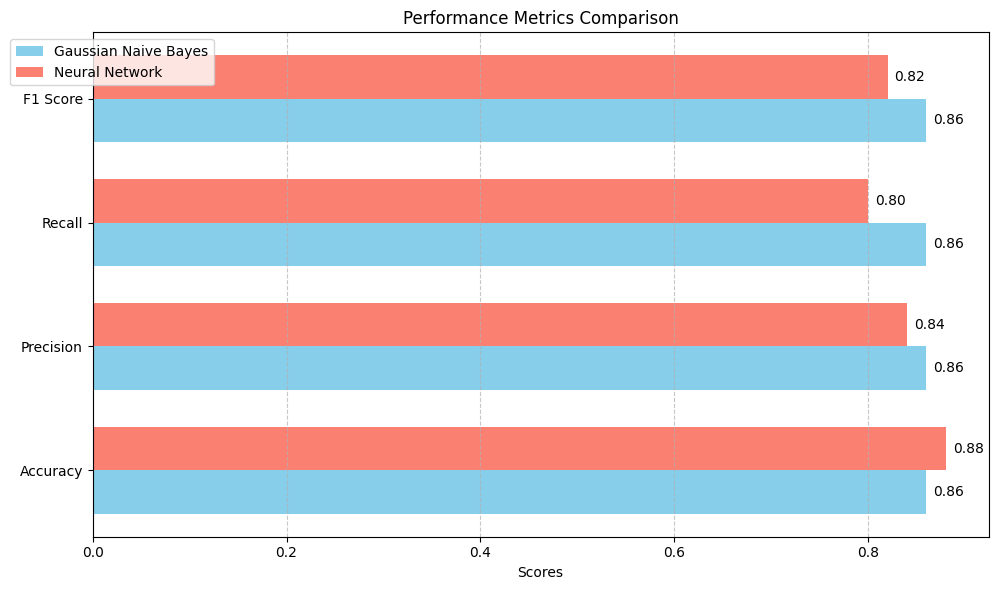

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for Gaussian Naive Bayes
accuracy_gnb = 0.86
precision_gnb = 0.86
recall_gnb = 0.86
f1_gnb = 0.86

# Metrics for Multilayer Perceptron
accuracy_nn = 0.88
precision_nn = 0.84
recall_nn = 0.80
f1_nn = 0.82

# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
gnb_metrics = [accuracy_gnb, precision_gnb, recall_gnb, f1_gnb]
nn_metrics = [accuracy_nn, precision_nn, recall_nn, f1_nn]

# Create a horizontal bar graph to compare the two models
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width
bar_width = 0.35

# Define positions for the bars (both on the left)
y_pos = np.arange(len(metrics))

# Create horizontal bars for each model
bars1 = ax.barh(y_pos - bar_width / 2, gnb_metrics, bar_width, label='Gaussian Naive Bayes', color='skyblue')
bars2 = ax.barh(y_pos + bar_width / 2, nn_metrics, bar_width, label='Neural Network', color='salmon')

# Add labels and title
ax.set_xlabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_yticks(y_pos)  # Set y-ticks to the position of the metrics
ax.set_yticklabels(metrics)

# Adjust legend position to the left side
ax.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))  # Change legend position to the left

# Add value labels on the right side of the bars
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, bar.get_y() + bar.get_height()/2),
                    xytext=(5, 0),  # 5 points horizontal offset
                    textcoords="offset points",
                    va='center')

add_value_labels(bars1)
add_value_labels(bars2)

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load your cleaned data
data = pd.read_csv('cleaned_data.csv')

# Define your target variable
target_variable = 'PCOS (Y/N)'

# Define your selected features
selected_features = [
    'Age(yrs)', 'Weight (Kg)', 'Follicle No. (R)', 'hair growth(Y/N)')
]

# Define your features and target variable
X = data[selected_features]
y = data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Print only the CV scores and mean CV score
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

Cross-validation scores: [0.95   0.9625 0.97   0.9725 0.9675]
Mean CV score: 0.9645000000000001


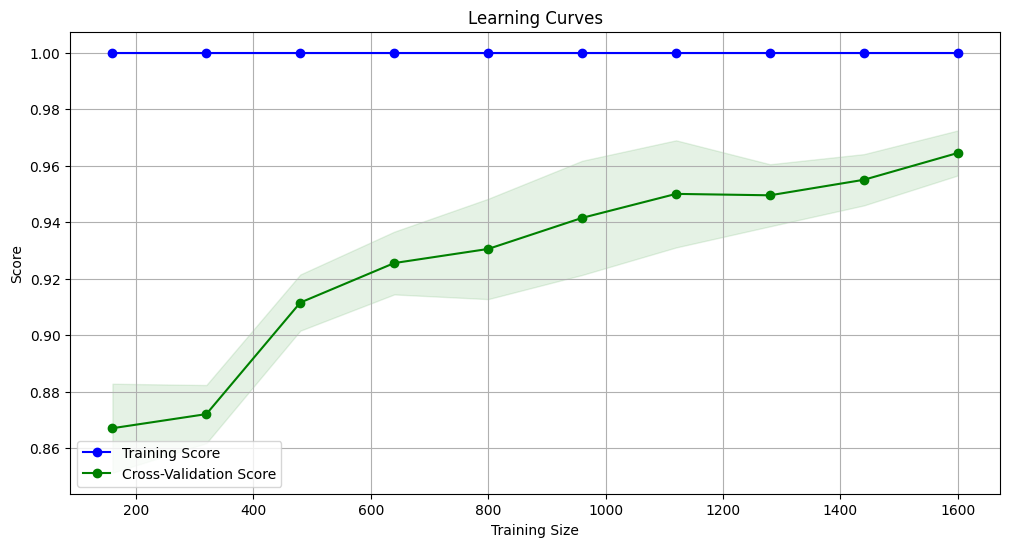

In [ ]:
# Plot Learning Curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-Validation Score')

# Plot the standard deviation as a shaded region
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color='green')

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

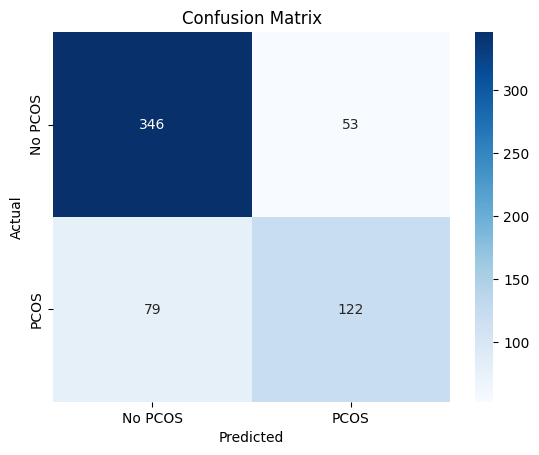

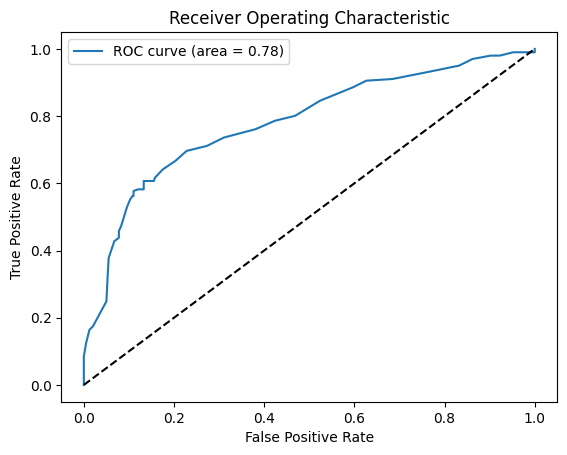

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_probs = gnb.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.show()


Doing Feature Selection to identify the most important features

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned data
data = pd.read_csv('cleaned_data.csv')

# Assuming 'Target_Variable' is your target column
target_variable = 'PCOS (Y/N)'

# Generate the correlation matrix
correlation_matrix = data.corr()

# Identify features highly correlated with the target variable
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

# Get the top 10 features correlated with the target variable
top_10_features = correlation_with_target.head(11)  # Include target variable itself
print("Top 10 features correlated with target variable:\n", top_10_features)


Top 10 features correlated with target variable:
 PCOS (Y/N)              1.000000
Follicle No. (R)        0.634140
Follicle No. (L)        0.599351
hair growth(Y/N)        0.482538
Skin darkening (Y/N)    0.466360
Weight gain(Y/N)        0.431333
Cycle(R/I)              0.398291
Fast food (Y/N)         0.384289
AMH(ng/mL)              0.289760
Pimples(Y/N)            0.278531
Weight (Kg)             0.221852
Name: PCOS (Y/N), dtype: float64


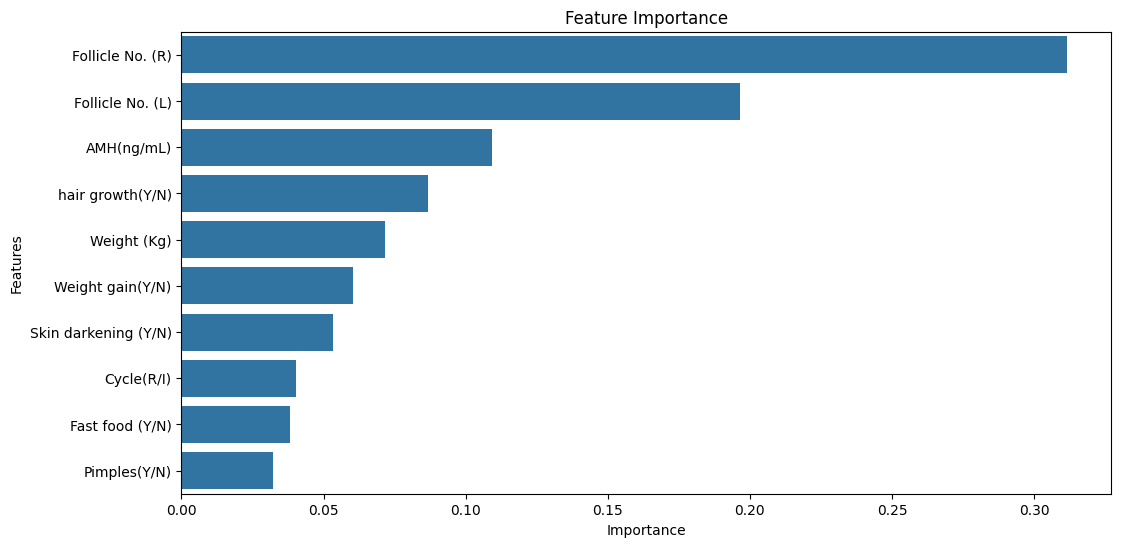

             Feature  Importance
    Follicle No. (R)    0.311588
    Follicle No. (L)    0.196536
          AMH(ng/mL)    0.109358
    hair growth(Y/N)    0.086768
         Weight (Kg)    0.071537
    Weight gain(Y/N)    0.060271
Skin darkening (Y/N)    0.053290
          Cycle(R/I)    0.040232
     Fast food (Y/N)    0.038171
        Pimples(Y/N)    0.032249


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your cleaned data
data = pd.read_csv('cleaned_data.csv')

# Define your target variable
target_variable = 'PCOS (Y/N)'

# Define your features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]  # Top 10 features
y = data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestClassifier(random_state=42)  # Use RandomForestRegressor if it's a regression problem
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance without index
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, errorbar=None)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Display the feature importance DataFrame
print(feature_importance.to_string(index=False))


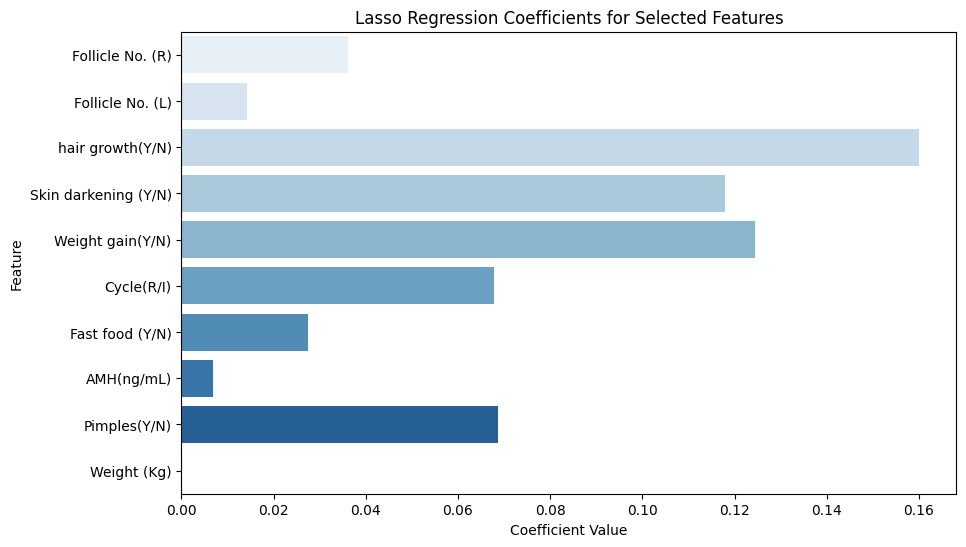

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Define your target variable
target_variable = 'PCOS (Y/N)'

# Define your features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Lasso model
lasso = LassoCV(cv=5)  # You can adjust the number of folds as needed
lasso.fit(X_train, y_train)

# Get the coefficients of the features
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})

# Filter features with non-zero coefficients
selected_features = coefficients[coefficients['Coefficient'] != 0]

# Plotting the coefficients using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=selected_features, hue='Feature', palette='Blues', legend=False)
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients for Selected Features')
plt.axvline(0, color='gray', linestyle='--')  # Add a vertical line at 0
plt.show()


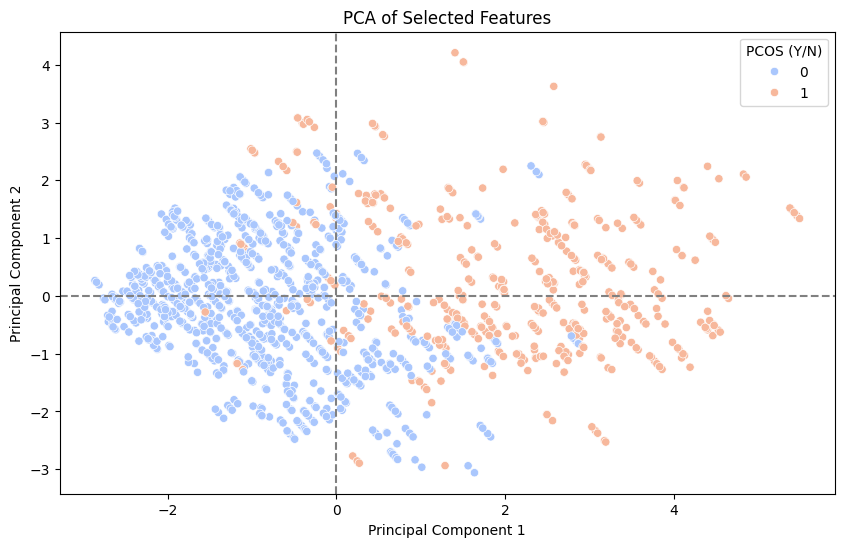

Explained Variance by Principal Components: [0.32676805 0.12704792]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define your target variable
target_variable = 'PCOS (Y/N)'

# Define your features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]  # Top 10 features
y = data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Create PCA object
pca = PCA(n_components=2)  # Change n_components to the number of components you want
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y_train.reset_index(drop=True)

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=pca_df, palette='coolwarm')
plt.title('PCA of Selected Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.legend(title='PCOS (Y/N)')
plt.show()

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by Principal Components: {explained_variance}')


Multi Layer Perceptron (MLP)






In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score  # Import metrics for evaluation
import pandas as pd  # Import pandas for handling dataframes

# Step 1: Define the features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data['PCOS (Y/N)']

# Step 2: Drop rows with any missing values in X
X = X.dropna()

# Step 3: Also drop the corresponding rows in the target variable to keep the alignment
y = y.loc[X.index]

# Step 4: Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['hair growth(Y/N)', 'Skin darkening (Y/N)', 'Weight gain(Y/N)',
                               'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)'], drop_first=True)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Align columns in training and testing sets
# Get missing columns in the training set
missing_cols_train = set(X_test.columns) - set(X_train.columns)
# Add a missing column in training set with default value equal to 0
for c in missing_cols_train:
    X_train[c] = 0
# Get missing columns in the testing set
missing_cols_test = set(X_train.columns) - set(X_test.columns)
# Add a missing column in testing set with default value equal to 0
for c in missing_cols_test:
    X_test[c] = 0

# Ensure the order of column in the test set is in the same order as in train set
X_test = X_test[X_train.columns]

# Step 6: Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Hidden layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Fit the model to the training data
history = model.fit(X_train, y_train, epochs=500, batch_size=20, validation_data=(X_test, y_test))

# Step 10: Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 11: Make predictions
y_pred_prob = model.predict(X_test)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 12: Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7621 - loss: 0.5495 - val_accuracy: 0.8767 - val_loss: 0.2857
Epoch 2/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8919 - loss: 0.2422 - val_accuracy: 0.9033 - val_loss: 0.2440
Epoch 3/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9187 - loss: 0.2166 - val_accuracy: 0.9150 - val_loss: 0.2270
Epoch 4/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9355 - loss: 0.1864 - val_accuracy: 0.9250 - val_loss: 0.2214
Epoch 5/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9336 - loss: 0.1951 - val_accuracy: 0.9283 - val_loss: 0.2141
Epoch 6/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9458 - loss: 0.1627 - val_accuracy: 0.9300 - val_loss: 0.2031
Epoch 7/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9360 - loss: 0.1562 - val_accuracy: 0.9250 - val_loss: 0.2031
Epoch 8/500
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9431 - loss: 0.1601 - val_accuracy: 0.9300 - val_loss: 0.1

Gaussian Naive Bayes (GNB)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data['PCOS (Y/N)']

# Step 2: Drop rows with any missing values in X
X = X.dropna()

# Step 3: Also drop the corresponding rows in the target variable to keep the alignment
y = y.loc[X.index]

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Normalize the feature data (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Build the Gaussian Naive Bayes model with var_smoothing hyperparameter
gnb = GaussianNB(var_smoothing=1e-9)

# Step 7: Train the model on the training data
gnb.fit(X_train, y_train)

# Step 8: Make predictions on the test data
y_pred = gnb.predict(X_test)

# Step 9: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 10: Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Test Accuracy: 0.89
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


Plot to compare the performance metrics of GNB and MLP

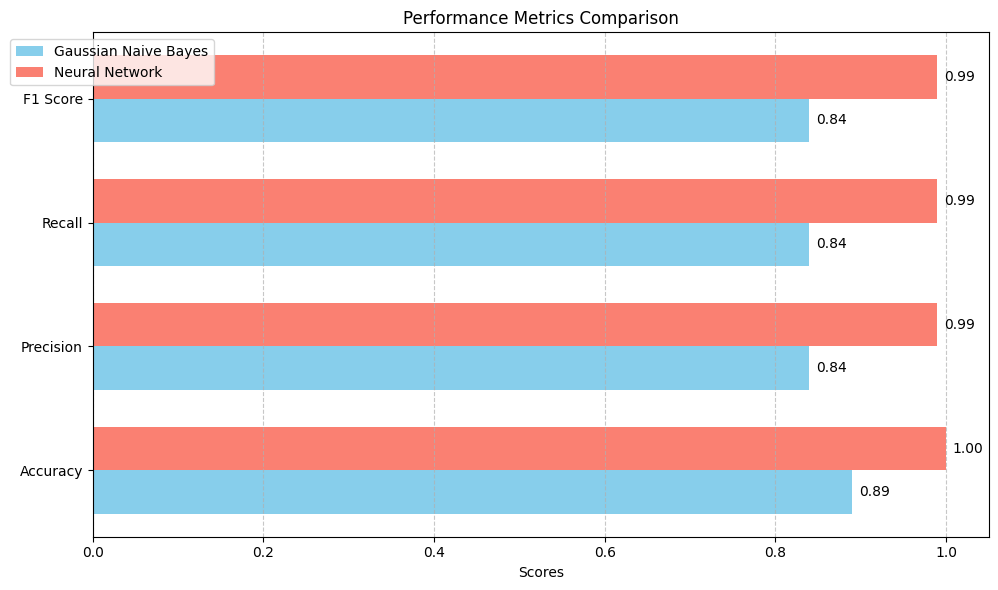

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for Gaussian Naive Bayes
accuracy_gnb = 0.89
precision_gnb = 0.84
recall_gnb = 0.84
f1_gnb = 0.84

# Metrics for Multilayer Perceptron
accuracy_nn = 1.00
precision_nn = 0.99
recall_nn = 0.99
f1_nn = 0.99

# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
gnb_metrics = [accuracy_gnb, precision_gnb, recall_gnb, f1_gnb]
nn_metrics = [accuracy_nn, precision_nn, recall_nn, f1_nn]

# Create a horizontal bar graph to compare the two models
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width
bar_width = 0.35

# Define positions for the bars (both on the left)
y_pos = np.arange(len(metrics))

# Create horizontal bars for each model
bars1 = ax.barh(y_pos - bar_width / 2, gnb_metrics, bar_width, label='Gaussian Naive Bayes', color='skyblue')
bars2 = ax.barh(y_pos + bar_width / 2, nn_metrics, bar_width, label='Neural Network', color='salmon')

# Add labels and title
ax.set_xlabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_yticks(y_pos)  # Set y-ticks to the position of the metrics
ax.set_yticklabels(metrics)

# Adjust legend position to the left side
ax.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))  # Change legend position to the left

# Add value labels on the right side of the bars
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, bar.get_y() + bar.get_height()/2),
                    xytext=(5, 0),  # 5 points horizontal offset
                    textcoords="offset points",
                    va='center')

add_value_labels(bars1)
add_value_labels(bars2)

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

Stochastic Gradient Descent (SGD)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data['PCOS (Y/N)']

# Step 2: Drop rows with any missing values in X
X = X.dropna()
y = y.loc[X.index]  # Align target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build the SGD Classifier model with the specified hyperparameters
sgd_clf = SGDClassifier(
    loss='hinge',              # Hinge loss for linear SVM
    penalty='l2',              # Use 'l2' for L2 regularization
    alpha=0.0001,              # Regularization strength
    max_iter=500,              # Set to 500 epochs
    tol=None,                  # Disable early stopping based on tolerance
    learning_rate='optimal',   # Learning rate schedule
    class_weight='balanced'    # Adjust weights inversely proportional to class frequencies in the input data
)

# Step 6: Train the model on the training data
sgd_clf.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = sgd_clf.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 9: Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Test Accuracy: 0.88
Precision: 0.81
Recall: 0.85
F1 Score: 0.83


Linear Regression (LIR)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Step 1: Define the features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data['PCOS (Y/N)']  # Assuming this is a binary target for classification

# Step 2: Drop rows with any missing values in X
X = X.dropna()
y = y.loc[X.index]  # Align target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build the Linear Regression model
lin_reg = LinearRegression()

# Step 6: Train the model on the training data
lin_reg.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = lin_reg.predict(X_test)

# Step 8: Convert continuous predictions to binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# Step 9: Calculate Mean Squared Error (MSE) and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 10: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Step 11: Print the performance metrics
print(f"Mean Squared Error: {mse:.2f}")  # Print MSE
print(f"R^2 Score: {r2:.2f}")  # Print R² Score
print(f"Accuracy: {accuracy:.2f}")  # Print accuracy


Mean Squared Error: 0.09
R^2 Score: 0.60
Accuracy: 0.91


Logistic Regression (LOR)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data['PCOS (Y/N)']  # Assuming this is a binary target for classification

# Step 2: Drop rows with any missing values in X
X = X.dropna()
y = y.loc[X.index]  # Align target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build the Logistic Regression model
log_reg = LogisticRegression()

# Step 6: Train the model on the training data
log_reg.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 9: Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 10: Print the performance metrics
print(f"Accuracy: {accuracy:.2f}")  # Print accuracy
print(f"Precision: {precision:.2f}")  # Print precision
print(f"Recall: {recall:.2f}")  # Print recall
print(f"F1 Score: {f1:.2f}")  # Print F1 Score


Accuracy: 0.91
Precision: 0.90
Recall: 0.82
F1 Score: 0.86


Random Forest (RF)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data['PCOS (Y/N)']  # Assuming this is a binary target for classification

# Drop rows with any missing values in X
X = X.dropna()
y = y.loc[X.index]  # Align target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the feature data (optional for tree-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Random Forest model with specified hyperparameters
rf_model = RandomForestClassifier(
    max_depth=20,          # Maximum depth of the tree
    random_state=0,        # Seed for reproducibility
    n_estimators=100,      # Number of trees in the forest
    criterion='gini',      # Function to measure the quality of a split
    max_features='sqrt',   # Number of features to consider when looking for the best split
    bootstrap=True         # Whether bootstrap samples are used when building trees
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1 Score: 0.99


 Bayesian Ridge Regression (BR)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data['PCOS (Y/N)']  # Assuming this is a binary target for classification

# Step 2: Drop rows with any missing values in X
X = X.dropna()
y = y.loc[X.index]  # Align target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build the Bayesian Ridge Regression model with specified hyperparameters
br_model = BayesianRidge(
    tol=1e-3,              # Tolerance for stopping criteria
    n_iter=300,            # Number of iterations
    alpha_1=1e-6,          # Hyperparameter for the Laplace prior
    lambda_1=1e-6,         # Hyperparameter for the Laplace prior
    alpha_2=1e-6,          # Hyperparameter for the Gaussian prior
    lambda_2=1e-6          # Hyperparameter for the Gaussian prior
)

# Step 5: Train the model on the training data
br_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = br_model.predict(X_test)

# Step 7: Convert predictions to binary labels using a threshold (0.5)
y_pred_labels = (y_pred > 0.5).astype(int)  # Adjust the threshold as necessary

# Step 8: Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 9: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)

# Step 10: Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

# Step 11: Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Mean Squared Error: 0.09
R^2 Score: 0.60
Accuracy: 0.91
Precision: 0.93
Recall: 0.77
F1 Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


Support Vector Machine (SVM)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data['PCOS (Y/N)']  # Assuming this is a binary target variable for classification

# Step 2: Drop rows with any missing values in X
X = X.dropna()
y = y.loc[X.index]  # Align target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build the SVM model with specified hyperparameters
svm_model = SVC(
    kernel='linear',                       # Type of kernel
    C=1,                                   # Regularization parameter
    degree=3,                              # Degree of the polynomial kernel (not used with linear kernel)
    gamma='scale',                         # Kernel coefficient
    tol=1e-3,                              # Tolerance for stopping criteria
    cache_size=200,                        # Size of the kernel cache
    decision_function_shape='ovr'         # One-vs-Rest for multiclass
)

# Step 5: Train the model on the training data
svm_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Step 7: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 8: Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 9: Print results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.91
Precision: 0.90
Recall: 0.81
F1 Score: 0.85


K-Nearest Neighbors Classifier (KNC)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data['PCOS (Y/N)']  # Assuming this is a binary target variable for classification

# Step 2: Drop rows with any missing values in X
X = X.dropna()
y = y.loc[X.index]  # Align target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build the KNC model with specified hyperparameters
knc_model = KNeighborsClassifier(
    n_neighbors=5,               # Number of neighbors
    weights='uniform',           # Weight function used in prediction
    algorithm='auto',            # Algorithm used to compute the nearest neighbors
    metric='minkowski',          # Distance metric to use for the tree
    leaf_size=30,                # Leaf size passed to the tree
    p=2                          # Power parameter for the Minkowski metric
)

# Step 5: Train the model on the training data
knc_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = knc_model.predict(X_test)

# Step 7: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 8: Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 9: Print results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.91
Precision: 0.93
Recall: 0.79
F1 Score: 0.85


Gradient Boosting Classifier (GBC)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the features and target variable
X = data[['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
           'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'AMH(ng/mL)',
           'Pimples(Y/N)', 'Weight (Kg)']]
y = data['PCOS (Y/N)']  # Assuming this is a binary target variable for classification

# Step 2: Drop rows with any missing values in X
X = X.dropna()
y = y.loc[X.index]  # Align target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build the Gradient Boosting Classifier with specified hyperparameters
gbc = GradientBoostingClassifier(
    loss='log_loss',              # Loss function to optimize
    max_depth=3,                  # Maximum depth of the individual trees
    learning_rate=0.1,            # Step size for each iteration
    criterion='friedman_mse',     # Criterion for measuring the quality of a split
    n_estimators=100              # Number of boosting stages to be run
)

# Step 5: Train the model on the training data
gbc.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = gbc.predict(X_test)

# Step 7: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 8: Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 9: Print results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.98
Precision: 0.98
Recall: 0.95
F1 Score: 0.97
